# Imports

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import multivariate_normal

# Berechnen des Mittelwertsvektors und der Kovarianzmatrix

In [6]:
x1 = np.array([[1], [2]])
x2 = np.array([[-1], [-1]])
x3 = np.array([[-5], [1]])
x4 = np.array([[1], [2]])

# Stichprobenmatrix erstellen
X = np.hstack((x1, x2, x3, x4))  

X_mean = np.mean(X,  axis=1, keepdims=True)  

print(f'Mittelwertsvektor:\n {X_mean}')


Mittelwertsvektor:
 [[-1.]
 [ 1.]]


In [7]:
C =  (1 / X.shape[1]) * np.dot((X - X_mean), (X - X_mean).T)

print(f'Auto Kovarianzmatrix:\n {C}')

Auto Kovarianzmatrix:
 [[6.  1. ]
 [1.  1.5]]


# Subplot Funktion für 3D-, Contour- & 2D-Sample-Plot

In [8]:
def generate_plts(mean, cov, sample_size):
    # Gitter erstellen und anhand der Mean/Cov automatisch scalen
    cov_max = max(cov[0][0], cov[1][1])
    mean_max = max(mean[0], mean[1])
    x_min = y_min = mean_max - 3 * np.sqrt(cov_max)
    x_max = y_max = mean_max + 3 * np.sqrt(cov_max)

    x, y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    pos = np.dstack((x, y))

    # Normalverteilungswerte berechnen
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(pos)

    # Zufällige Samples generieren
    samples = rv.rvs(sample_size)

    fig = plt.figure(figsize=(24,7))

    # 3D Plot
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.set_title('3D-Distribution')
    ax1.plot_surface(x, y, z, cmap='viridis', linewidth=0)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Contour Plot
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.set_title('Contour-Plot')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    cp = ax2.contour(x, y, z)
    ax2.clabel(cp, inline=True, fontsize=10)

    # 2D-Distribution of random sample
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.set_title('2D-Distribution')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
    
    plt.axis('equal')
    
    fig.suptitle('Multivariate Normal Distribution (d=2)')

    fig.text(0.1, 0.22, f'Sample Size: {sample_size}', horizontalalignment='center', verticalalignment='center')    
    fig.text(0.1, 0.2, f'Mean X: {mean[0]}', horizontalalignment='center', verticalalignment='center')
    fig.text(0.1, 0.17, f'Mean Y: {mean[1]}', horizontalalignment='center', verticalalignment='center')
    fig.text(0.1, 0.14, f'Var X: {cov[0][0]}', horizontalalignment='center', verticalalignment='center')
    fig.text(0.1, 0.11, f'Var Y: {cov[1][1]}', horizontalalignment='center', verticalalignment='center')
    fig.text(0.1, 0.09, f'CoVar X/Y: {cov[0][1]}', horizontalalignment='center', verticalalignment='center')
    plt.show()

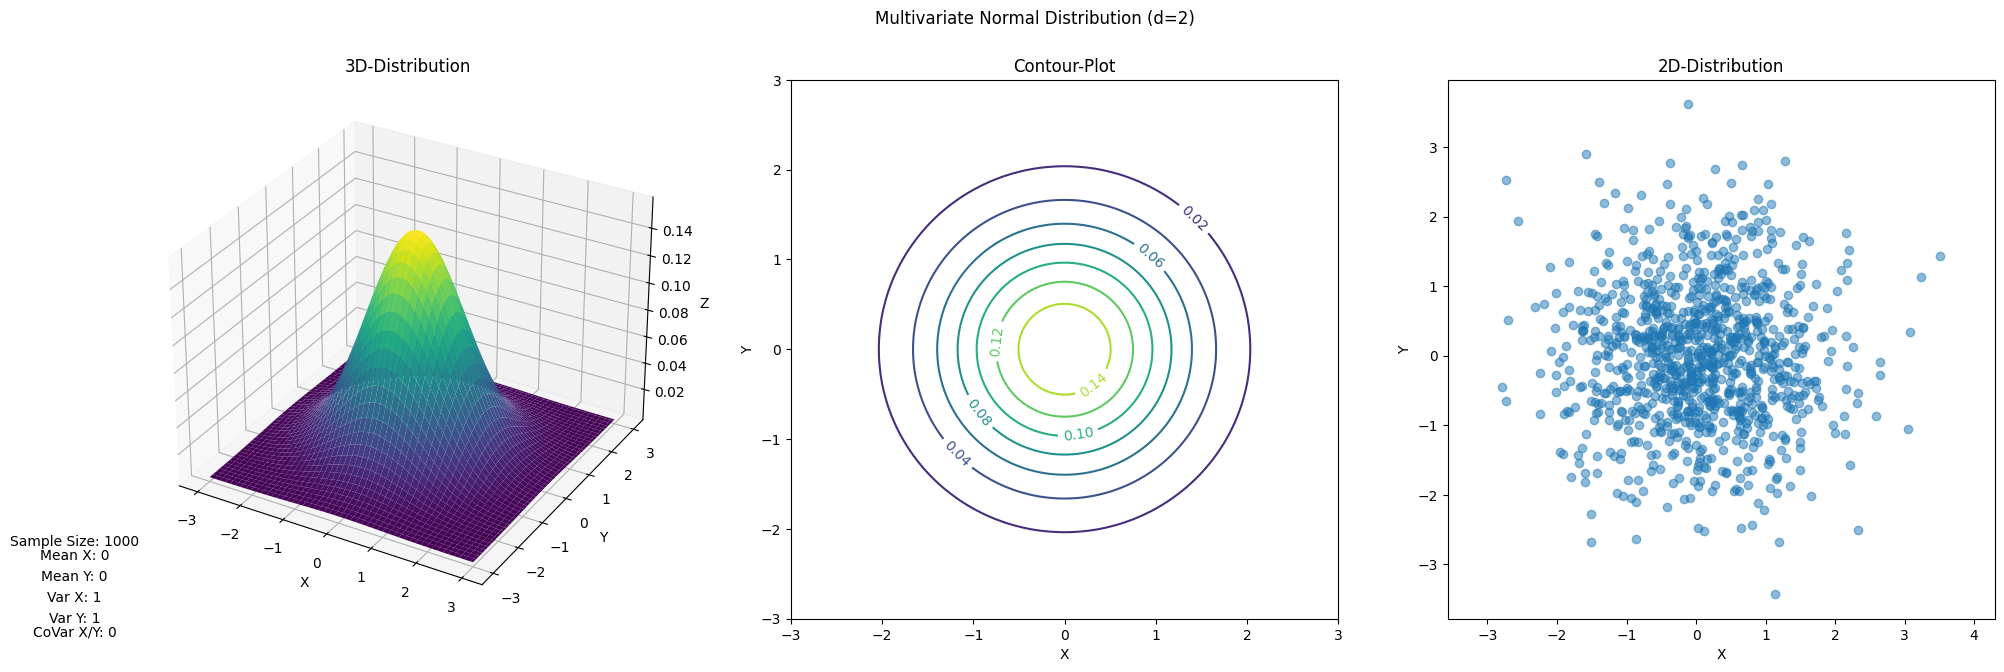

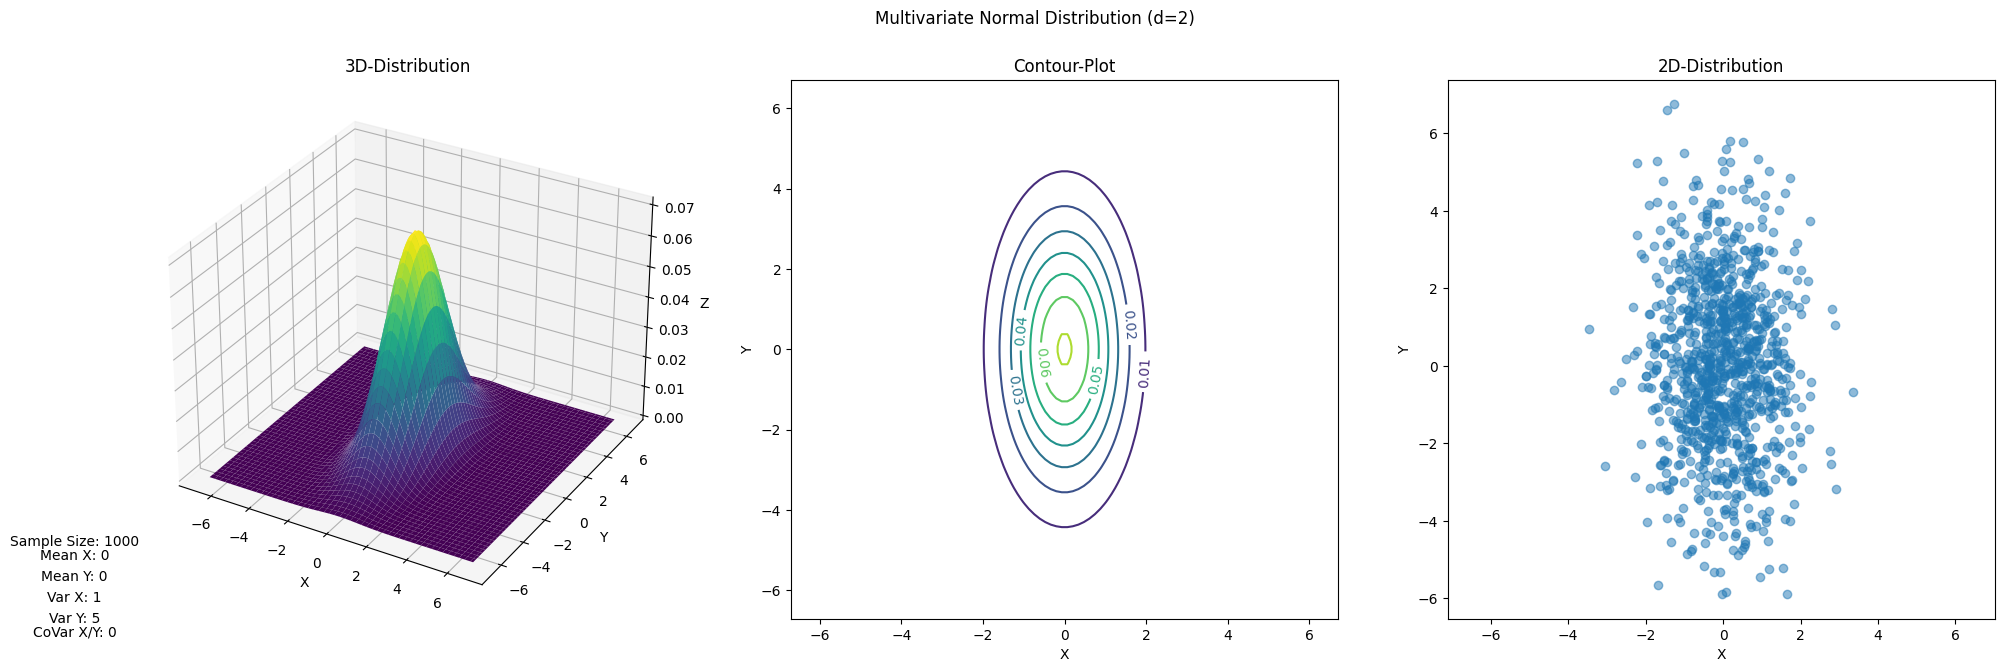

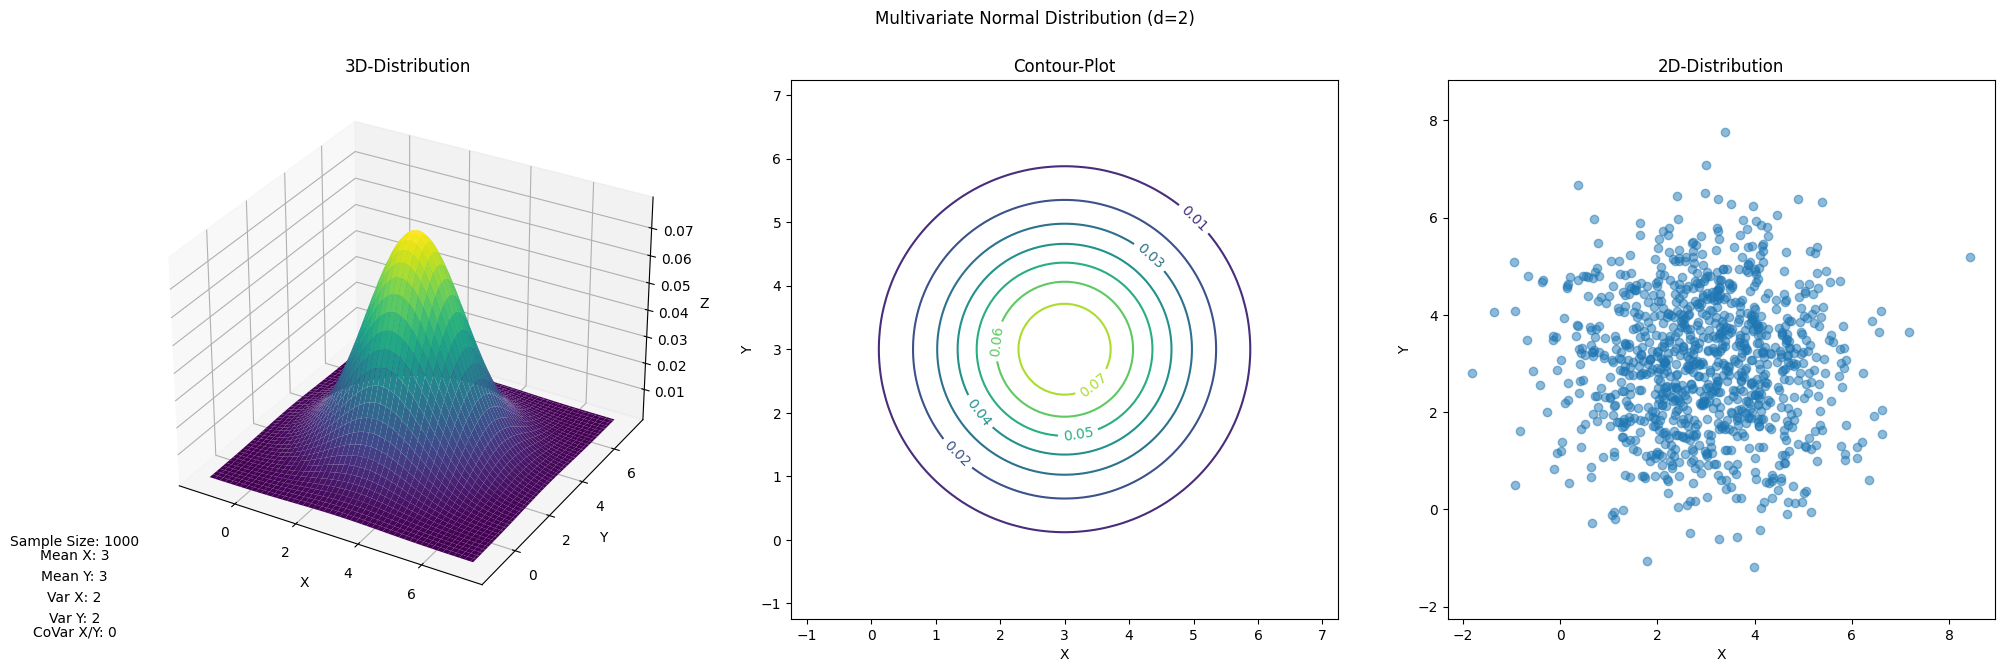

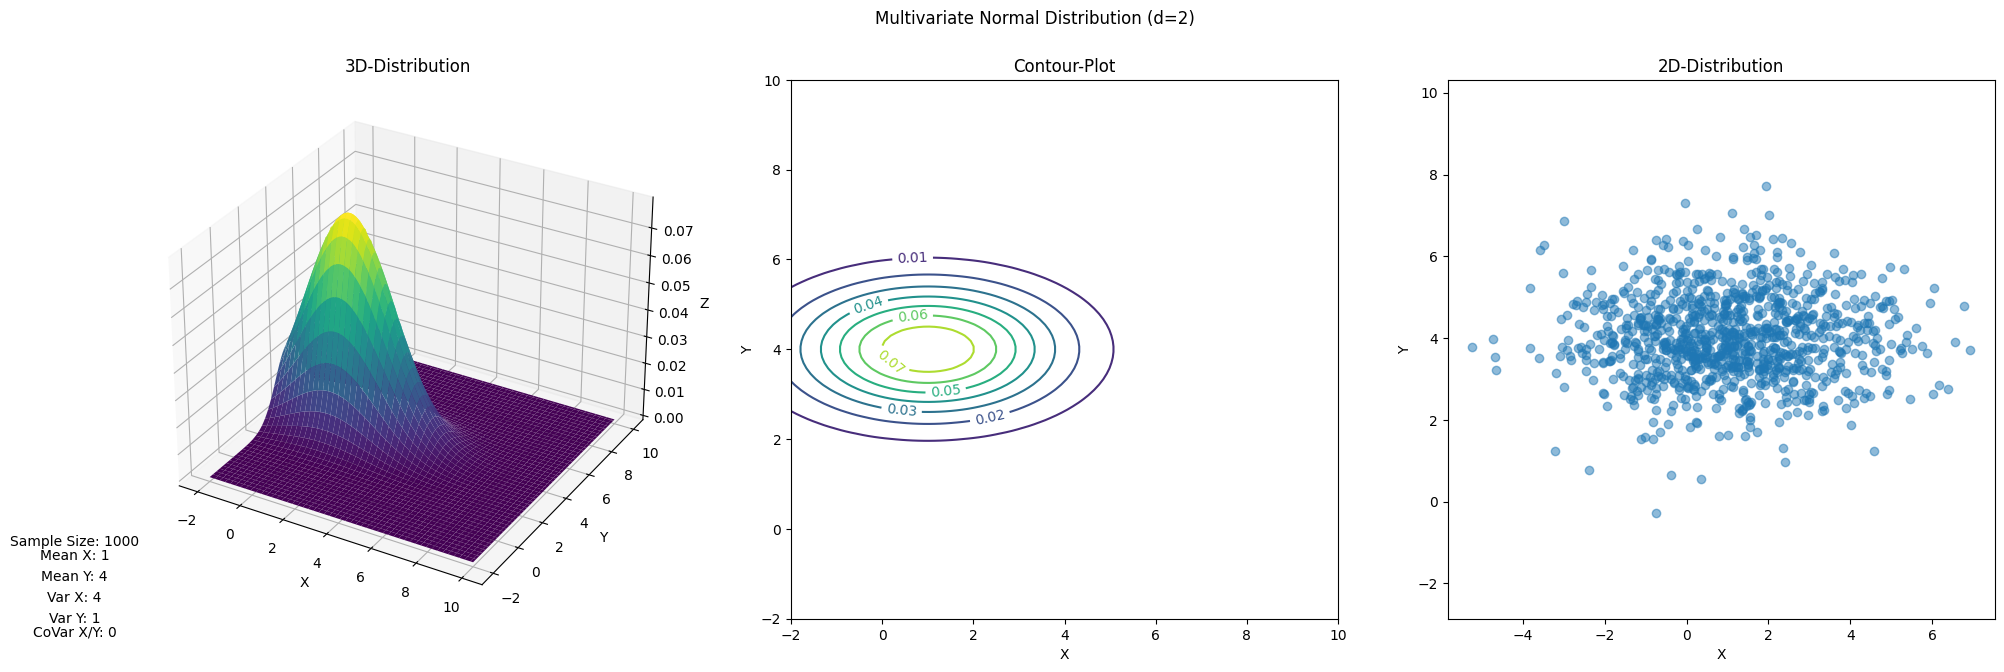

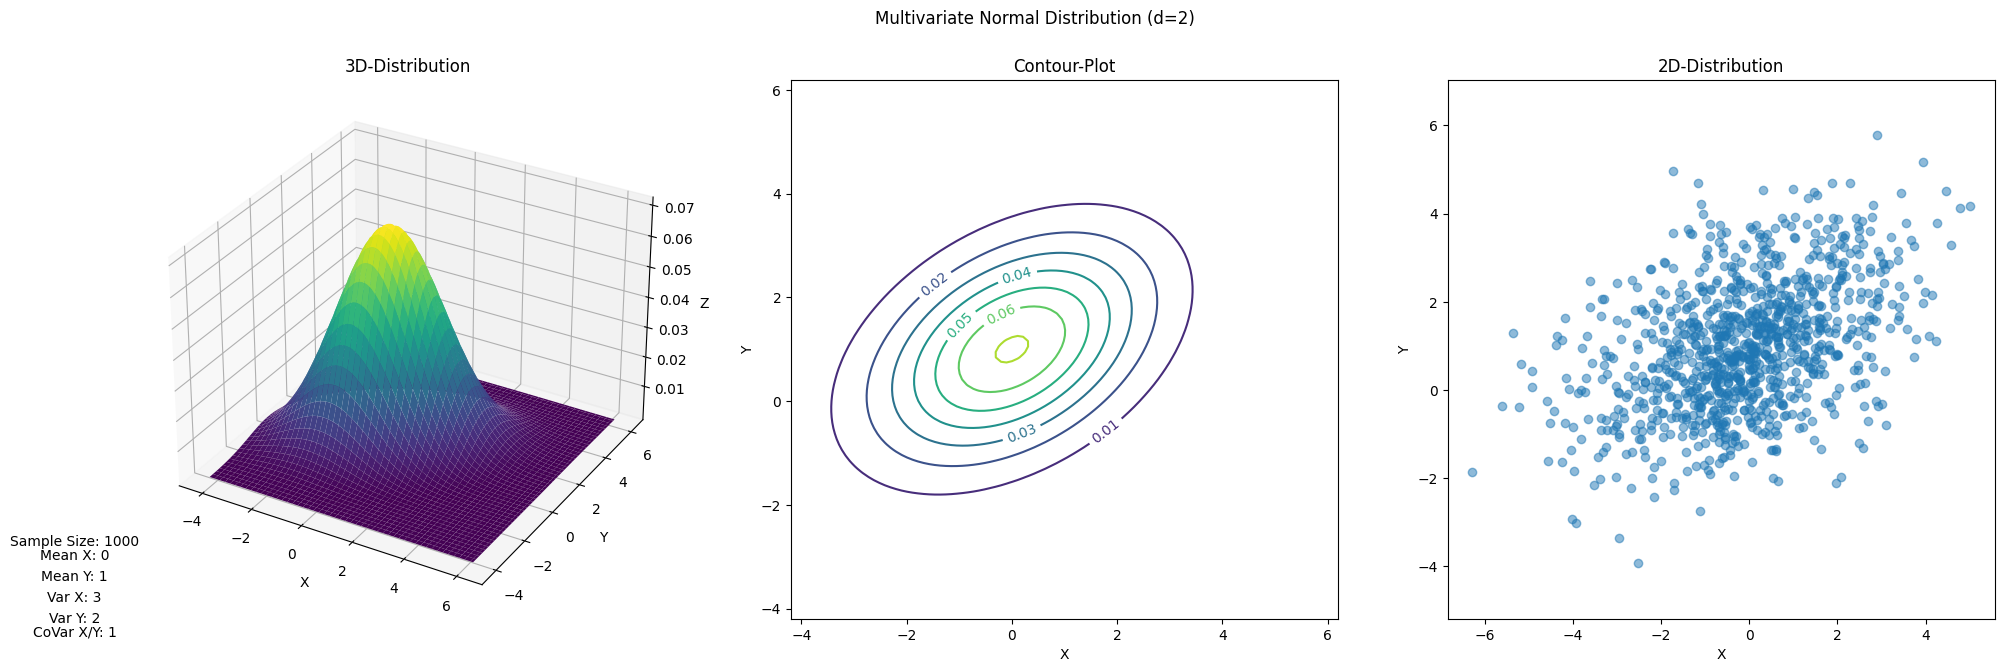

In [11]:
sample_size = 1000

# Mittelwert, Kovarianzmatrix und Sample Size definieren
mean = [0, 0]
cov = [[1, 0], [0, 1]]
generate_plts(mean, cov, sample_size)

mean = [0, 0]
cov = [[1, 0], [0, 5]]
generate_plts(mean, cov, sample_size)

mean = [3, 3]
cov = [[2, 0], [0, 2]]
generate_plts(mean, cov, sample_size)

mean = [1, 4]
cov = [[4, 0], [0, 1]]
generate_plts(mean, cov, sample_size)

mean = [0, 1]
cov = [[3, 1], [1, 2]]
generate_plts(mean, cov, sample_size)

# Lage von U & V

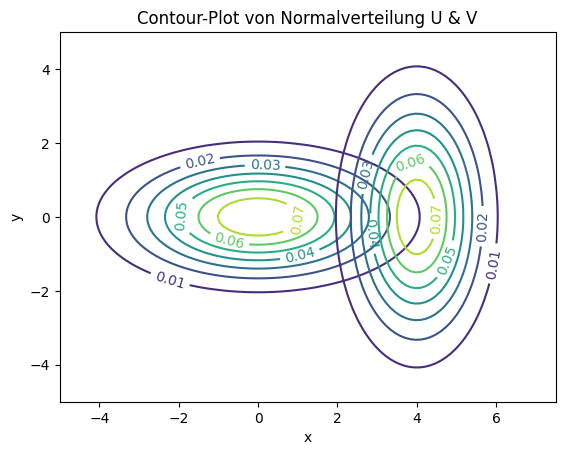

In [105]:
# Parameter für die erste Normalverteilung
mean_u = [0, 0]
cov_u = [[4, 0], [0, 1]]

# Parameter für die zweite Normalverteilung
mean_v = [4, 0]
cov_v = [[1, 0], [0, 4]]

# Gitter erstellen
x, y = np.meshgrid(np.linspace(-5, 7.5, 100), np.linspace(-5, 5, 100))
pos = np.dstack((x, y))

# PDFs der Normalverteilungen berechnen
rv_u = multivariate_normal(mean_u, cov_u)
z_u = rv_u.pdf(pos)

rv_v = multivariate_normal(mean_v, cov_v)
z_v = rv_v.pdf(pos)

# Contour-Plots erstellen
fig, ax = plt.subplots()
cp_u = ax.contour(x, y, z_u)
ax.clabel(cp_u, inline=True, fontsize=10)
cp_v = ax.contour(x, y, z_v)
ax.clabel(cp_v, inline=True, fontsize=10)

# Titel und Achsenbeschriftungen hinzufügen
ax.set_title('Contour-Plot von Normalverteilung U & V')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Schaubild anzeigen
plt.show()

# Trennfunktion für U & V

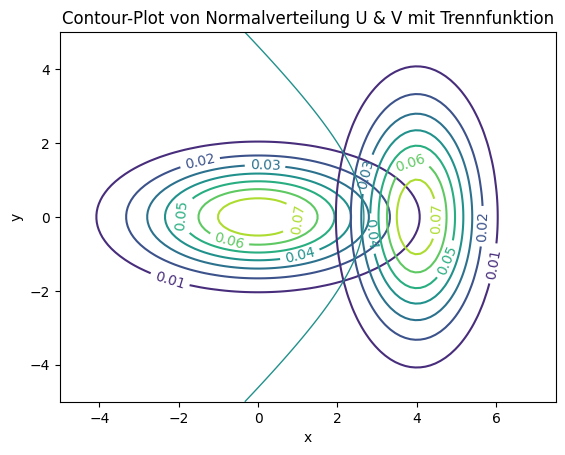

In [106]:
# Trennfunktion berechnen
z_trenn = np.log(rv_u.pdf(pos) / rv_v.pdf(pos))


# Contour-Plots erstellen
fig, ax = plt.subplots()
cp_u = ax.contour(x, y, z_u)
ax.clabel(cp_u, inline=True, fontsize=10)
cp_v = ax.contour(x, y, z_v)
ax.clabel(cp_v, inline=True, fontsize=10)
cp_trenn = ax.contour(x, y, z_trenn, levels=0, linewidths=1)

# Titel und Achsenbeschriftungen hinzufügen
ax.set_title('Contour-Plot von Normalverteilung U & V mit Trennfunktion')
ax.set_xlabel('x')
ax.set_ylabel('y')


# Schaubild anzeigen
plt.show()